# Numpy

This notebook will show examples of use and operations with the Numpy library. Part of the information shown in the booklet has been extracted from the book: "Python Data Science HandBook (2017)" [online version](https://jakevdp.github.io/PythonDataScienceHandbook/).

*The text is released under the CC-BY-NC-ND license, and code is released under the MIT license. If you find this content useful, please consider supporting the work by [buying the book!](http://shop.oreilly.com/product/0636920034919.do).*

Table of contents:

* [1. Creating Arrays from Scratch](#1.-Creating-Arrays-from-Scratch)
* [2. Data Manipulation using NumPy](#2.-Data-Manipulation-using-NumPy) 
  * [2.1. Attributes](#attributes)
  * [2.2. Array Indexing](#Array-Indexing.-Accesing-to-single-elements)
  * [2.3. Array Slicing](#Array-Slicing:-Accessing-Subarrays).
  * [2.4. Subarrays as no-copy views](#Subarrays-as-no-copy-views).
  * [2.5. Creating copies of arrays](#Creating-copies-of-arrays).
  * [2.6. Reshaping of Arrays](#Reshaping-of-Arrays).
  * [2.7. Splitting of Arrays](#Splitting-of-Arrays). 
* [3. Computation on NumPy Arrays: Universal Functions](#3.-Computation-on-NumPy-Arrays:-Universal-Functions).
  * [3.1. Introducing to UFuncs](#3.1.-Introducing-UFuncs)
  * [3.2. Exploring](#3.2.-Exploring-UFuncs)
  * [3.3 Specialized UFuncs](#3.3.-Specialized-ufuncs)
* [4. Aggregations: Min, Max and everything in between](#4.-Aggregations:-Min,-Max-and-everything-in-between)
  * [4.1. Summing the Values in an Array](#4.1.-Summing-the-Values-in-an-Array)
  * [4.2. Min and Max](#4.2.-Min-and-Max)
  * [4.3. Multi Dimensional aggregates](#4.3.-Multi-dimensional-aggregates)
  * [Example: What is the average height of US President.](#Example:-What-is-the-average-height-of-US-Presidents?)
* [5. Computation on Arrays: Broadcasting](#5.-Computation-on-Arrays:-Broadcasting)
  * [5.1. Introducing to Broadcasting](#5.1.-Introducing-to-Broadcasting.)

## 1. Creating Arrays from Scratch

Especially for larger arrays, it is **more efficient** to create arrays from scratch **using routines** built into NumPy. Here are several examples. We'll start with the standard NumPy import, under the alias np:

In [2]:
import numpy as np

In [2]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [4]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [5]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [9]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [2]:
a = np.array([[1., 2.],[4., 5.]])
print(a)

[[1. 2.]
 [4. 5.]]


In [12]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.74778554, 0.97596455, 0.25233894],
       [0.75400273, 0.59962465, 0.35108106],
       [0.13527468, 0.98132142, 0.04422794]])

In [13]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.47480562, -0.89955885,  1.29303459],
       [ 1.04271041,  0.46552169, -0.60269015],
       [ 0.20269149, -0.46546784, -0.19825129]])

In [14]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[5, 0, 6],
       [2, 3, 7],
       [6, 5, 1]])

In [15]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

## 2. Data Manipulation using NumPy

These are the categories that will be seen:

- **Attributes of arrays**: Determining the size, shape, memory consumption, and data types of arrays
- **Indexing of arrays**: Getting and setting the value of individual array elements
- **Slicing of arrays**: Getting and setting smaller subarrays within a larger array
- **Reshaping of arrays**: Changing the shape of a given array
- **Joining and splitting of arrays**: Combining multiple arrays into one, and splitting one array into many

### 2.1. Attributes

Each array has the following attributes. Another useful attribute is the `dtype`, the data type of the array.

In [21]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

print("x3 ndim :", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size :", x3.size)
print("x3 dtype:", x3.dtype)
print("itemsize:", x3.itemsize, "bytes")
print("nbytes  :", x3.nbytes, "bytes")

x3 ndim : 3
x3 shape: (3, 4, 5)
x3 size : 60
x3 dtype: int64
itemsize: 8 bytes
nbytes  : 480 bytes


In general, we expect that nbytes is equal to itemsize times size (`x3_size * 8 bytes/per = 480 bytes`)

### 2.2. Array Indexing. Accesing to single elements

In [3]:
x1 = np.random.randint(10, size=6)  # One-dimensional array
print(x1)
print(x1[0])
print(x1[-1])

[2 3 9 7 7 8]
2
8


In [24]:
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
print(x2)
print(x2[0, 0])
print(x2[2, -1])

[[3 6 7 2]
 [0 3 5 9]
 [4 4 6 4]]
3
4


Values can also be modified using any of the above index notation. Keep in mind that, unlike Python lists, NumPy arrays have a **fixed type**. This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently **truncated**. Don't be caught unaware by this behavior!

In [28]:
x2[0, 0] = 12
x2

array([[12,  6,  7,  2],
       [ 0,  3,  5,  9],
       [ 4,  4,  6,  4]])

In [29]:
x2[0, 0] = 3.14159  # this will be truncated!
x2

array([[3, 6, 7, 2],
       [0, 3, 5, 9],
       [4, 4, 6, 4]])

### 2.3. Array Slicing: Accessing Subarrays

We can use square brakets to access subarrays with the slice notation, marked by the colon (`:`) character. The NumPy slicing syntax follows that of the standard Python list.

```python
x[start:stop:step]
```

If any of these are unspecified, they default to the values `start=0`, `stop=size of dimension`, `step=1`.

#### One-dimensional subarrays

In [3]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [6]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [7]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [8]:
x[1::2]  # every other element, starting at index 1


array([1, 3, 5, 7, 9])

In [10]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

#### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas. For example:

In [12]:
x2 = np.random.randint(10, size=(3, 4))
x2

array([[6, 7, 3, 8],
       [4, 2, 3, 0],
       [7, 6, 1, 4]])

In [16]:
x2[:2, :3]  # two rows, three columns

array([[6, 7, 3],
       [4, 2, 3]])

In [20]:
x2[:3, ::2]  # all rows, every other column

array([[6, 3],
       [4, 3],
       [7, 1]])

In [21]:
x2[::-1, ::-1]

array([[4, 1, 6, 7],
       [0, 3, 2, 4],
       [8, 3, 7, 6]])

In [27]:
print(x2[:, 0])  # first column of x2

[6 4 7]


In [29]:
print(x2[0, :])  # first row of x2

[6 7 3 8]


In [30]:
print(x2[0])  # equivalent to x2[0, :]

[6 7 3 8]


### 2.4. Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return **views** rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. Consider our two-dimensional array from before, Let's extract a $2 \times 2$ subarray from this:

In [32]:
print(x2)  # first column of x2

[[6 7 3 8]
 [4 2 3 0]
 [7 6 1 4]]


In [33]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[6 7]
 [4 2]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [34]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  7]
 [ 4  2]]


In [36]:
print(x2)

[[99  7  3  8]
 [ 4  2  3  0]
 [ 7  6  1  4]]


It is just a pointer to the same memory direction than $x_2$. This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### 2.5. Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the `copy()` method. If we now modify this subarray, the original array is not touched.

In [37]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  7]
 [ 4  2]]


In [38]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  7]
 [ 4  2]]


In [39]:
print(x2)

[[99  7  3  8]
 [ 4  2  3  0]
 [ 7  6  1  4]]


### 2.6. Reshaping of Arrays

For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [40]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. This can be done with the `reshape` method, or more easily done by making use of the `newaxis` keyword within a slice operation:

In [46]:
x = np.array([1, 2, 3]) # one-row matrix
x

array([1, 2, 3])

In [45]:
# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [42]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [43]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [44]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines:
- `np.concatenate`,
- `np.vstack`,
- `np.hstack`.

`np.concatenate` takes a tuple or list of arrays as its first argument, as we can see here:

In [49]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
print(np.concatenate([x, y]))

[1 2 3 3 2 1]
[ 1  2  3  3  2  1 99 99 99]


In [50]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [51]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [54]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the `np.vstack` (vertical stack) and `np.hstack` (horizontal stack) functions. Similary, `np.dstack` will stack arrays along the third axis.

In [55]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [56]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### 2.7. Splitting of Arrays

The opposite of concatenation is splitting, which is implemented by the functions `np.split`, `np.hsplit`, and `np.vsplit`. For each of these, we can pass a list of indices giving the split points. Similarly, `np.dsplit` will split arrays along the third axis.

In [57]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [58]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [61]:
upper, lower = np.vsplit(grid, [2])
print(upper, "\n")
print(lower)

[[0 1 2 3]
 [4 5 6 7]] 

[[ 8  9 10 11]
 [12 13 14 15]]


In [62]:
left, right = np.hsplit(grid, [2])
print(left, "\n")
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## 3. Computation on NumPy Arrays: Universal Functions

The key to making NumPy fast is to use **vectorized operations**, generally implemented through NumPy's universal functions (ufuncs). This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient. It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

Python's default implementation (known as CPython) does some operations very slowly. This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran. Projects such as PyPy, Cython or Numbra solved this weakness but none of the three approaches has yet surpassed the reach and populaity og the standar CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.

In [66]:
import numpy as np
np.random.seed(0) # Random values and fixed if called again.

In [67]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [68]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.64 s ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3.1. Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs are extremely flexible.

In [70]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [71]:
%timeit (1.0 / big_array)

1.68 ms ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


More examples

In [72]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [3]:
np.mean(a, axis=1)

array([1.5, 4.5])

### 3.2. Exploring UFuncs

- Array arithmetic (`+`, `-`, `*`, `//`, `**`, . . .).
- Absolute value (`abs`).
- Trigonometric functions.
- Exponents and logarithms.

### 3.3. Specialized ufuncs


A few ufuncs are:
- Hyperbolic trig functions.
- Bitwise arithmetic.
- Comparison operators.
- Conversions from radians to degrees
- Rounding and remainders.
- ...
Another excellent source for more specialized and obscure ufuncs is the submodule `scipy.special`.


In [4]:
import numpy as np
from scipy import special
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [6]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)    =", special.erf(x))
print("erfc(x)   =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


- Advances UFunc Features.
  - Specifying output.
  - Aggregates.
  - Outer products.

## 4. Aggregations: Min, Max and everything in between

The most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

### 4.1. Summing the Values in an Array


In [9]:
import numpy as np
L = np.random.random(100)
sum(L)

47.15743790116465

In [10]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

130 ms ± 3.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
396 µs ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 4.2. Min and Max

In [31]:
%timeit min(big_array)
%timeit np.min(big_array)

79.4 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
401 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 4.3. Multi dimensional aggregates

By default, each NumPy aggregation function will return the aggregate over the entire array. Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. For example, we can find the minimum value within each column by specifying `axis=0`.

In [12]:
M = np.random.random((3, 4))
print(M)

[[0.18262375 0.46236789 0.67359783 0.12756768]
 [0.10161616 0.17529685 0.58928918 0.45103008]
 [0.56353944 0.45619395 0.68627753 0.828925  ]]


In [16]:
M.sum()

5.298325346475847

In [19]:
M.min()

0.10161616141991192

In [17]:
M.min(axis=0) # Columns

array([0.10161616, 0.17529685, 0.58928918, 0.12756768])

In [21]:
M.max(axis=1) # Rows

array([0.67359783, 0.58928918, 0.828925  ])

The following table provides a list of useful aggregation functions available in NumPy:

| Function Name   | NaN-safe Version   | Description                               |
| :-------------- | :----------------- | :---------------------------------------- |
| `np.sum`        | `np.nansum`        | Compute sum of elements                   |
| `np.prod`       | `np.nanprod`       | Compute product of elements               |
| `np.mean`       | `np.nanmean`       | Compute mean of elements                  |
| `np.std`        | `np.nanstd`        | Compute standard deviation                |
| `np.var`        | `np.nanvar`        | Compute variance                          |
| `np.min`        | `np.nanmin`        | Find minimum value                        |
| `np.max`        | `np.nanmax`        | Find maximum value                        |
| `np.argmin`     | `np.nanargmin`     | Find index of minimum value               |
| `np.argmax`     | `np.nanargmax`     | Find index of maximum value               |
| `np.median`     | `np.nanmedian`     | Compute median of elements                |
| `np.percentile` | `np.nanpercentile` | Compute rank-based statistics of elements |
| `np.any`        | N/A                | Evaluate whether any elements are true    |
| `np.all`        | N/A                | Evaluate whether all elements are true    |


### Example: What is the average height of US Presidents?

Reading the `president_heights.csv` file:

In [24]:
!head -4 ./data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [25]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)']) # chose specific column.
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [27]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193
25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


Percentil equation: $i = nk$, $nk$ is integer: $P_k = \frac{i+(i+1)}{2}$, if not $nk$ integer then $P_k=next\_integer\_value$ where, $n$ is the number of data and $k$ si the percentil value (25, 75...).

An introduction to MatPlotLib, show the representation of this data:

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

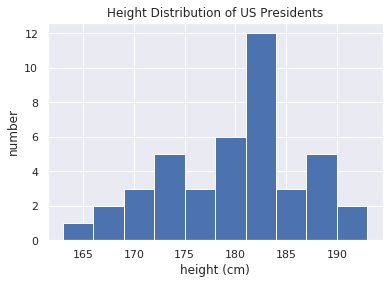

In [30]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## 5. Computation on Arrays: Broadcasting

Another means of vectorizing operations is to use NumPy's broadcasting functionality. Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

### 5.1. Introducing to Broadcasting.

Notes:

For Table Of Contents installing, type the following commands:
```bash
jupyter nbextension install --user https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.js
curl -L https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.css > $(jupyter --data-dir)/nbextensions/toc.css
jupyter nbextension enable toc
```